<a href="https://colab.research.google.com/github/maihao14/Earthquake-Arrivals-Dataset-for-AI/blob/main/QuakeLabeler_with_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Prepare an Earthquake Dataset via QuakeLabeler

In this notebook we will introduce how to design an Earthquake dataset from online earthquake cataloge clients by using our Python package: QuakeLabler. \\

By using QuakeLabeler, we could select the region and time range for the desired dataset. Then QuakeLabeler will auto search the relevant earthquake events through ISC arrival bulletin website. A detailed `Pandas.DataFrame` object will be collected to record the detailed upcoming dataset(samples). The last step is download and processe the raw waveforms based on the target recordings to estabilish a dataset.
 
[For more details, view QuakeLabeler GitHub repository](https://github.com/maihao14/QuakeLabeler)

# Step 0: Preparation | Installation
Install essential packages 
Here we directly clone QuakeLabeler package from GitHub repository. `QuakeLabeler` will install dependency packages, i.e., ObsPy, PyGMT, requestes,etc., simultaneously. 


## Install ObsPy
Using `!pip install obspy` to install `obspy` package. \\
To make sure it could run successfully. Always restart the runtime before next step. \\
Method: Click `Runtime` -> `Restart runtime`

In [1]:
!pip install obspy
# remember always to restart the running time before next cell

     |████████████████████████████████| 24.7 MB 71 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21667090 sha256=b31dea960da5d0ffd4c3ebb5ba5cd8f3a5d5226b3d579cfab44e601f892fca62
  Stored in directory: /root/.cache/pip/wheels/28/7e/ea/0a37d5f5001d096cf97d6527b60300badd2d0074449e89c736
Successfully built obspy


## Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


## Install dependent package: PyGMT
Installation of PyGMT in Google Colab is tricky. <br>
Thanks to Author: [A.L. Belem](mailto:andrebelem@id.uff.br) @ [Oceanographic Observatory](http://www.observatoiriooceanografico.uff.br) 2021 (version 1)<br>
Create this notebook made for students in the **Climate Change and its Impacts** class (and for those more interested in) using [PyGMT](https://www.pygmt.org/latest/) to produce their figures. The challenge here was to use the new [GMT6](https://www.generic-mapping-tools.org/) with PyGMT in the COLAB environment (without having to install python locally).<br>

The lines below can work separately or together. The suggestion is that you keep running each line and studying both its content and the result. Copy to your Google Drive and modify as necessary (in addition to including your own annotations).<br>

This Notebook is designed to be used in **Google Colab**, but it also fits the Jupyter Notebook or Jupyter Lab. Just skip the installation part and go straight to the pygmt code if you have already installed everything on your desktop.

In [ ]:

# cite from GitHub@andrebelem  
# https://github.com/andrebelem/pythonverse/blob/main/PyGMT_on_COLAB.ipynb

%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

In [ ]:
# install pygmt with pip
%%capture
!pip install pygmt

# Step 1: Install QuakeLabeler
QuakeLabeler includes all other dependencies. 

In [ ]:
!git clone https://github.com/maihao14/QuakeLabeler.git
%cd QuakeLabeler/
!pip install .
%cd ..

Cloning into 'QuakeLabeler'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (714/714), done.
remote: Compressing objects: 100% (451/451), done.
remote: Total 714 (delta 366), reused 569 (delta 240), pack-reused 0
Receiving objects: 100% (714/714), 7.76 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (366/366), done.
/content/QuakeLabeler
Processing /content/QuakeLabeler
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 574 kB 6.1 MB/s 
  Created wheel for QuakeLabeler: filename=QuakeLabeler-0.0.1-py3-none-any.whl size=480407 sha256=a35e989e4fea6382fbb8377f4495fad02b36d7a42e099ab6fb

# Step 2: Start QuakeLabeler   
Import `QuakeLabeler`. 

In [ ]:
# import package
from quakelabeler import *
print("Import package finished!")

Import package finished!


# Example: Collect global earthquakes in 2018 Jan 01-Jun 15
## Start Interactive interface

In [ ]:
# start Interactive interface
user_interface = Interactive()

Welcome to QuakeLabeler----Fast AI Earthquake Dataset Deployment Tool!

   ____              _        _           _          _
  / __ \            | |      | |         | |        | |
 | |  | |_   _  __ _| | _____| |     __ _| |__   ___| | ___ _ __
 | |  | | | | |/ _` | |/ / _ \ |    / _` | '_ \ / _ \ |/ _ \ '__|
 | |__| | |_| | (_| |   <  __/ |___| (_| | |_) |  __/ |  __/ |
  \___\_\__,_|\__,_|_|\_\___|______\__,_|_.__/ \___|_|\___|_|
        
QuakeLabeler provides multiple modes for different levels of Seismic AI researchers 
 
[Beginner]  mode -- Quick start dataset recipes in small, middle, large scales. 
[Advanced]  mode -- Custom all details in your dataset. 
[Benchmark] mode -- Built-in standard seismic datasets in scales.
Please select a mode: [1/2/3/Beginner/Advanced/Benchmark] 2
Initialize Advanced Mode...
Alternative region options are provided. Please select your preferred input function: 
 
Please select one : 
[STN/GLOBAL/RECT/CIRC/FE/POLY] 
                         [STN]:

## Auto collection of interested catalog

In [ ]:
if not user_interface.benchmark_flag:
    # run normal mode: beginner / advanced
    query = QueryArrival(**user_interface.params)
else:
    # run benchmark mode
    query = BuiltInCatalog(user_interface)

NameError: ignored

## Preview of earthquake maps

In [ ]:
MT = MergeMetadata(query.record_folder) 
filelist = MT.select_folder()
temp_pd = MT.merge_event(filelist)
event_pd = MT.event_clean(temp_pd)
total_station = MT.merge_station(filelist)
# add network name to station catalog
sta_cat = MT.station_clean(total_station)

In [ ]:
GM = GlobalMaps(total_station,event_pd)

/usr/local/lib/python3.7/dist-packages/quakelabeler/classes.py:2440: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  pen="black"


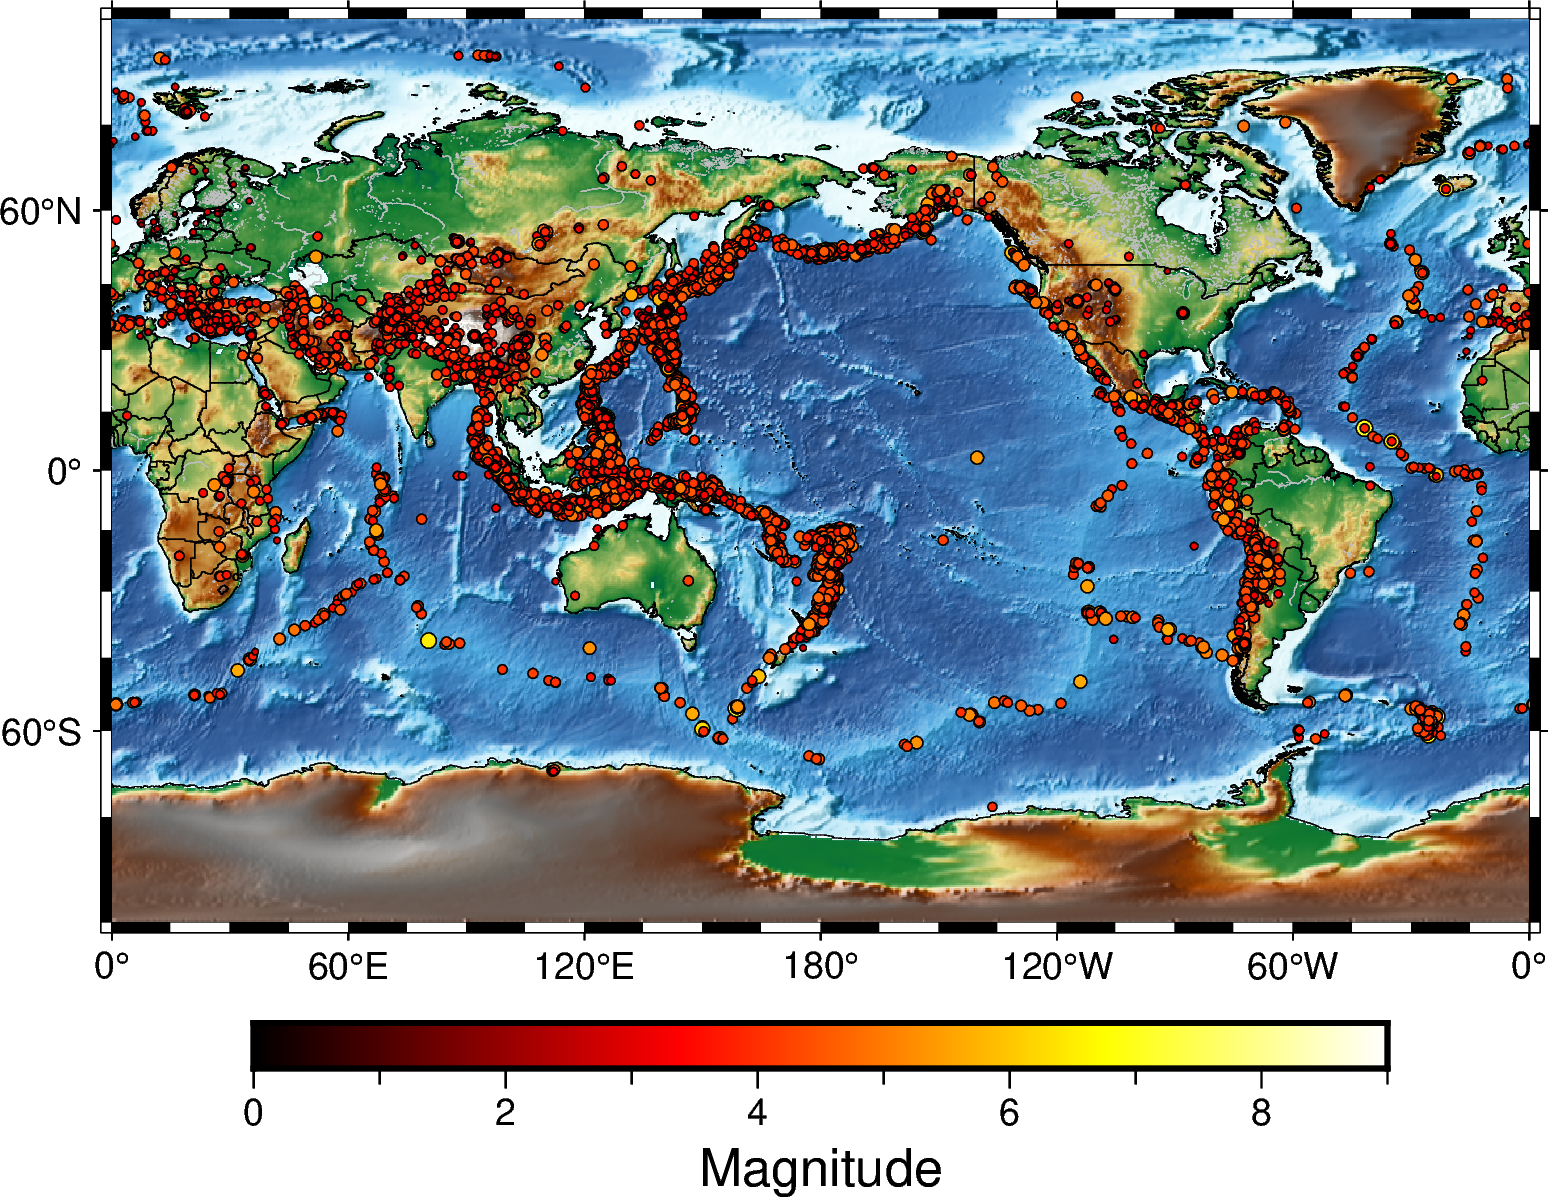

In [ ]:
GM.event_map(event_pd) 

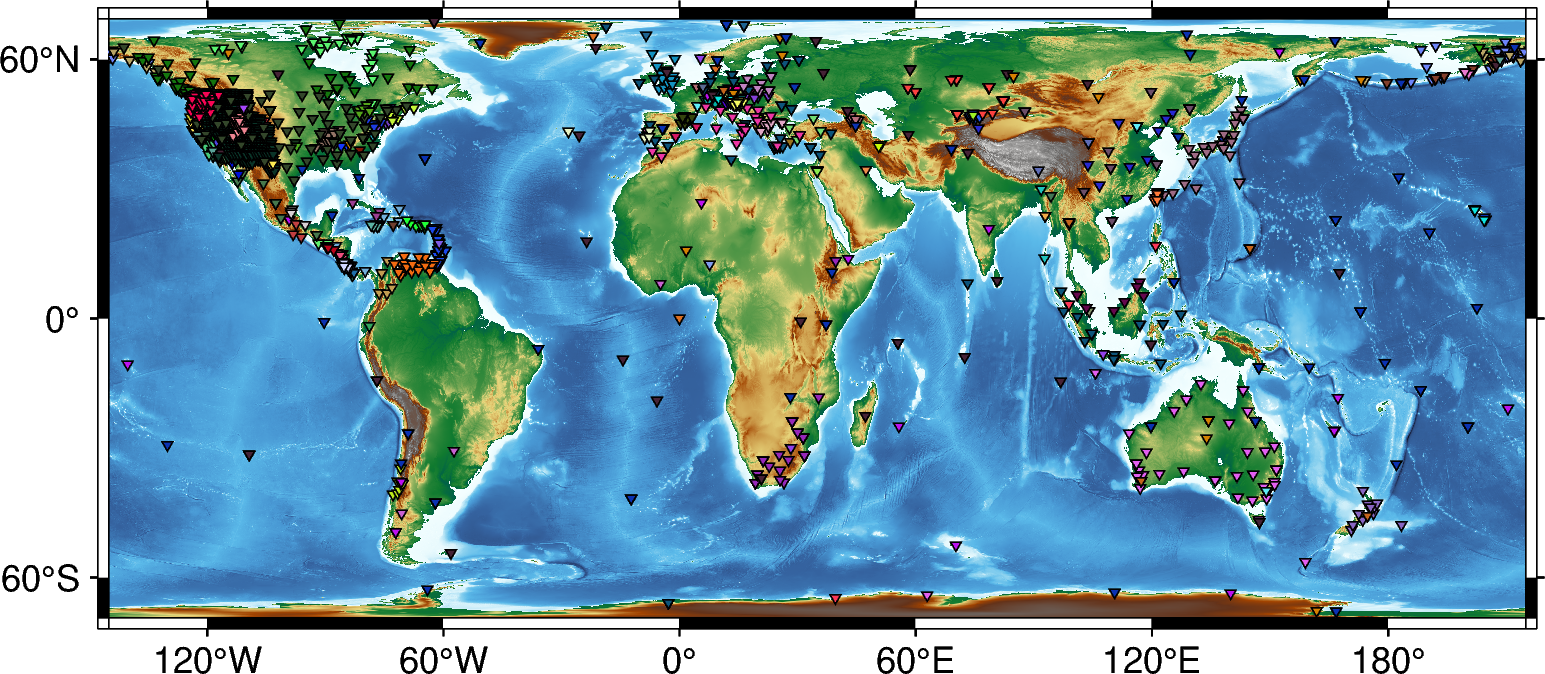

In [ ]:
GM.station_map(sta_cat)

/usr/local/lib/python3.7/dist-packages/quakelabeler/classes.py:2505: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  pen="black"


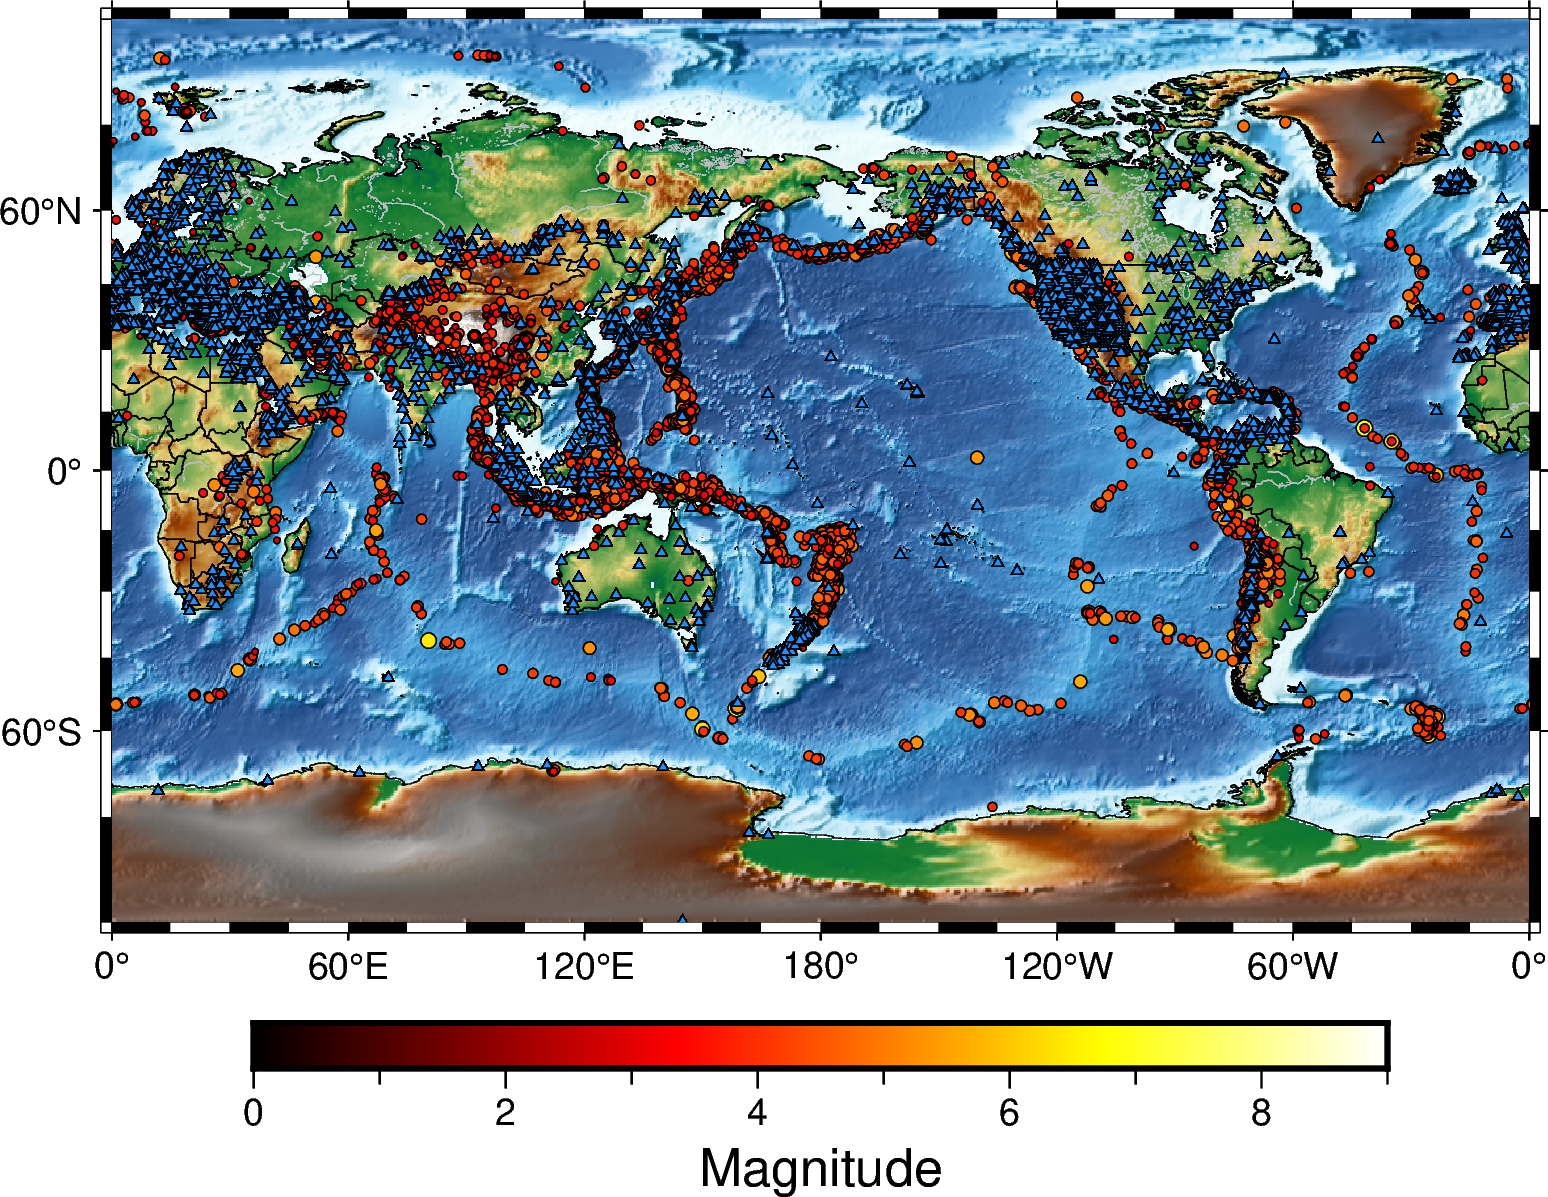

In [ ]:
GM.event_station_map(event_pd,total_station)

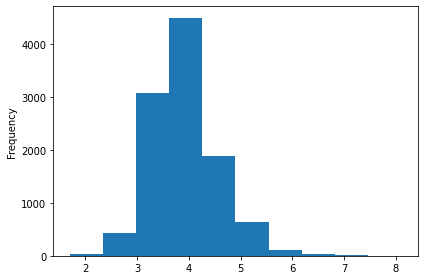

In [ ]:
GM.hist_plot(event_pd)

# Step 3: Save Figures into Google Drive

In [ ]:
! mkdir ./drive/My Drive/Maps/
# copy it there
!cp global*map.png "./drive/My Drive/Maps/"
#This wil show error  but actually work is done (see Files on the left)

mkdir: cannot create directory ‘./drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/Maps/’: No such file or directory


# Step 4: Start custom tool


In [ ]:
# init custom options
custom = CustomSamples(user_interface.receipe_flag)
# run custom of dataset structure
custom.init()
# auto-production of dataset

# Step 5 Auto-production of dataset
 

In [ ]:
auto_dataset = QuakeLabeler(query, custom)

In [ ]:
# data collect and process
auto_dataset.fetch_all_waveforms(auto_dataset.recordings)

In [ ]:
# waveform graph
auto_dataset.waveform_display()

In [ ]:
# start Interactive interface
user_interface_1 = Interactive()

# Step 5 (Alternative): If you prefer write scripts...
Here's an alternative way if you don't want to use interactive shells. Just type in all parameters which describe your custom region and time range. 

For global dataset, we recommend using no more than half year time range. Because ISC website don't allow to query more than 60,000 events at one time. 

# Eaxmple: Collect all ISC reviewed earthquakes(arrivals) in Jan-June 2007

In [ ]:
# request modules
import time
import requests
starttime = time.time()
# global station global region 365/2 days 
URL = 'http://www.isc.ac.uk/cgi-bin/web-db-v4'
# if it's too slow, try above mirror website
# URL = 'http://isc-mirror.iris.washington.edu/iscbulletin/search/arrivals/'
global_365_a = {
                'iscreview':'on',
                'out_format':'CSV',
                'ttime':'on',
                'ttres':'on',
                'tdef':'on',
                'amps':'on',
                'stnsearch':'GLOBAL',
                'searchshape':'GLOBAL',
                'start_year':'2007',
                'start_month':'1',
                'start_day':'1',
                'start_time':'00:00:00',
                'end_year':'2007',
                'end_month':'6',
                'end_day':'15',
                'end_time':'23:59:59',
                'req_mag_type':'Any',
                'req_mag_agcy':'Any',
                'include_links':'on',
                'request':'STNARRIVALS'
}
# request target global events
r = requests.get(url=URL, params = global_365_a)
endtime = time.time()
totaltime = endtime - starttime
print("The running time of request is {0}min {1} sec".format(totaltime//60,totaltime%60))

The running time of request is 14.0min 30.312748908996582 sec


## If you want to dig into how `QuakeLabeler` search metadata for building catalog...

In [ ]:
import re
import pandas as pd
def find_all_vars(text, *args):
    r"""Store all arrival information
    This method save all fetched information into `recordings`:
        #. EVENTID
        #. STA
        #. PHASE NAME
        #. ARRIVAL DATE
        #. ARRIVAL TIME
        #. ORIGIN DATE
        #. ORIGIN TIME
        #. EVENT TYPE
        #. EVENT MAG
    """
    ex = r'MAG (.*) '
    all_variables = re.findall(ex, text, re.S)
    all_vars = re.split(r',', all_variables[0])
    #find last index
    for index in range(len(all_vars) - 1, 0, -1):
        if 'STOP' in all_vars[index]:
            break
    # initialization of recording, include all webset information
    recordings = {
    'EVENTID' : [] ,
    'STA' : [],
    'CHN' : [],
    'ISCPHASE' : [],
    'REPPHASE' : [],
    'ARRIVAL_LAT' : [],
    'ARRIVAL_LON' : [],
    'ARRIVAL_ELEV' : [],
    'ARRIVAL_DIST' : [],
    'ARRIVAL_BAZ' : [],
    'ARRIVAL_DATE' : [],
    'ARRIVAL_TIME' : [],
    'ORIGIN_LAT' : [],
    'ORIGIN_LON' : [],
    'ORIGINL_DEPTH' : [],
    'ORIGIN_DATE' : [],
    'ORIGIN_TIME' : [],
    'EVENT_TYPE' :[],
    'EVENT_MAG' : [] }
    pattern = re.compile(r'(?<=event_id=)\d*')
    pattern_sta = re.compile(r'stacode=(.*) target')
    for i in range(0, index, 25):
        recordings['EVENTID'].append(int(pattern.findall(all_vars[i])[0]))
        recordings['STA'].append(pattern_sta.findall(all_vars[i+2])[0])
        recordings['CHN'].append(str.strip(all_vars[i+6]))
        recordings['ISCPHASE'].append(str.strip(all_vars[i+9]))
        recordings['REPPHASE'].append(str.strip(all_vars[i+10]))
        recordings['ARRIVAL_LAT'].append(float(all_vars[i+3]))
        recordings['ARRIVAL_LON'].append(float(all_vars[i+4]))
        recordings['ARRIVAL_ELEV'].append(float(all_vars[i+5]))
        recordings['ARRIVAL_DIST'].append(float(all_vars[i+7]))
        recordings['ARRIVAL_BAZ'].append(float(all_vars[i+8]))
        recordings['ARRIVAL_DATE'].append(str.strip(all_vars[i+11]))
        recordings['ARRIVAL_TIME'].append(str.strip(all_vars[i+12]))
        recordings['ORIGIN_LAT'].append(float(all_vars[i+20]))
        recordings['ORIGIN_LON'].append(float(all_vars[i+21]))
        recordings['ORIGINL_DEPTH'].append(float(all_vars[i+22]))
        recordings['ORIGIN_DATE'].append(str.strip(all_vars[i+18]))
        recordings['ORIGIN_TIME'].append(str.strip(all_vars[i+19]))
        recordings['EVENT_TYPE'].append(str.strip(all_vars[i+24]))
        if str.isspace(re.split('\n', all_vars[i+25])[0]):
            recordings['EVENT_MAG'].append(float('NaN'))
        else:
            recordings['EVENT_MAG'].append(float(re.split('\n', all_vars[i+25])[0]))
    return recordings   

In [ ]:

#mark of first half of year
recordings = find_all_vars(r.text, 'EVENTID', 'STA','CHN',
                        'ISCPHASE','REPPHASE',  
                        'ARRIVAL_LAT', 'ARRIVAL_LON',
                        'ARRIVAL_ELEV','ARRIVAL_DIST','ARRIVAL_BAZ',
                        'ARRIVAL_DATE','ARRIVAL_TIME',
                        'ORIGIN_LAT' ,'ORIGIN_LON','ORIGINL_DEPTH',
                        'ORIGIN_DATE' ,'ORIGIN_TIME',
                        'EVENT_TYPE','EVENT_MAG')
data = pd.DataFrame(data=recordings)
filename = "/content/drive/My Drive/DataSet/" + "global_2007_365_a.csv"
data.to_csv(filename)

# Step 6: Collect Global Catalogues from 1980 to 2006 

## Let's search for a long timeline: 1980-2006
Add a loop function for the above scripts. And save all the recordings to Google Drive for later use.

In [ ]:
# import packages
import time
import requests
import re
import pandas as pd
def query(year,which_half):
    starttime = time.time()
    # global station global region 365/2 days 
    URL = 'http://www.isc.ac.uk/cgi-bin/web-db-v4'
    # if it's too slow, try above mirror website
    # URL = 'http://isc-mirror.iris.washington.edu/iscbulletin/search/arrivals/'
    if which_half=="a":
        # first half of the year
        global_365 = {
                        'iscreview':'on',
                        'out_format':'CSV',
                        'ttime':'on',
                        'ttres':'on',
                        'tdef':'on',
                        'amps':'on',
                        'stnsearch':'GLOBAL',
                        'searchshape':'GLOBAL',
                        'start_year':str(year),
                        'start_month':'1',
                        'start_day':'1',
                        'start_time':'00:00:00',
                        'end_year':str(year),
                        'end_month':'6',
                        'end_day':'15',
                        'end_time':'23:59:59',
                        'req_mag_type':'Any',
                        'req_mag_agcy':'Any',
                        'include_links':'on',
                        'request':'STNARRIVALS'
        }
    # request target global events
    r = requests.get(url=URL, params = global_365)
    endtime = time.time()
    totaltime = endtime - starttime
    print("The running time of request is {0}min {1} sec".format(totaltime//60,totaltime%60))
    return r

In [ ]:
def find_all_vars(text, *args):
    r"""Store all arrival information
    This method save all fetched information into `recordings`:
        #. EVENTID
        #. STA
        #. PHASE NAME
        #. ARRIVAL DATE
        #. ARRIVAL TIME
        #. ORIGIN DATE
        #. ORIGIN TIME
        #. EVENT TYPE
        #. EVENT MAG
    """
    ex = r'MAG (.*) '
    all_variables = re.findall(ex, text, re.S)
    all_vars = re.split(r',', all_variables[0])
    #find last index
    for index in range(len(all_vars) - 1, 0, -1):
        if 'STOP' in all_vars[index]:
            break
    # initialization of recording, include all webset information
    recordings = {
    'EVENTID' : [] ,
    'STA' : [],
    'CHN' : [],
    'ISCPHASE' : [],
    'REPPHASE' : [],
    'ARRIVAL_LAT' : [],
    'ARRIVAL_LON' : [],
    'ARRIVAL_ELEV' : [],
    'ARRIVAL_DIST' : [],
    'ARRIVAL_BAZ' : [],
    'ARRIVAL_DATE' : [],
    'ARRIVAL_TIME' : [],
    'ORIGIN_LAT' : [],
    'ORIGIN_LON' : [],
    'ORIGINL_DEPTH' : [],
    'ORIGIN_DATE' : [],
    'ORIGIN_TIME' : [],
    'EVENT_TYPE' :[],
    'EVENT_MAG' : [] }
    pattern = re.compile(r'(?<=event_id=)\d*')
    pattern_sta = re.compile(r'stacode=(.*) target')
    for i in range(0, index, 25):
        recordings['EVENTID'].append(int(pattern.findall(all_vars[i])[0]))
        recordings['STA'].append(pattern_sta.findall(all_vars[i+2])[0])
        recordings['CHN'].append(str.strip(all_vars[i+6]))
        recordings['ISCPHASE'].append(str.strip(all_vars[i+9]))
        recordings['REPPHASE'].append(str.strip(all_vars[i+10]))
        recordings['ARRIVAL_LAT'].append(float(all_vars[i+3]))
        recordings['ARRIVAL_LON'].append(float(all_vars[i+4]))
        recordings['ARRIVAL_ELEV'].append(float(all_vars[i+5]))
        recordings['ARRIVAL_DIST'].append(float(all_vars[i+7]))
        recordings['ARRIVAL_BAZ'].append(float(all_vars[i+8]))
        recordings['ARRIVAL_DATE'].append(str.strip(all_vars[i+11]))
        recordings['ARRIVAL_TIME'].append(str.strip(all_vars[i+12]))
        recordings['ORIGIN_LAT'].append(float(all_vars[i+20]))
        recordings['ORIGIN_LON'].append(float(all_vars[i+21]))
        recordings['ORIGINL_DEPTH'].append(float(all_vars[i+22]) if not all_vars[i+22].isspace() else float("NaN"))
        recordings['ORIGIN_DATE'].append(str.strip(all_vars[i+18]))
        recordings['ORIGIN_TIME'].append(str.strip(all_vars[i+19]))
        recordings['EVENT_TYPE'].append(str.strip(all_vars[i+24]))
        if str.isspace(re.split('\n', all_vars[i+25])[0]):
            recordings['EVENT_MAG'].append(float('NaN'))
        else:
            recordings['EVENT_MAG'].append(float(re.split('\n', all_vars[i+25])[0]))
    return recordings   

In [ ]:
years = [
        # 2006,2005,2004,2003,2002,2001,2000,
         1999,1997,1996,1995,1994,1993,1992,1991,1990,
         1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
         ]
half = "a"
for year in years:
    r = query(year,half)
    recordings = find_all_vars(r.text, 'EVENTID', 'STA','CHN',
                            'ISCPHASE','REPPHASE',  
                            'ARRIVAL_LAT', 'ARRIVAL_LON',
                            'ARRIVAL_ELEV','ARRIVAL_DIST','ARRIVAL_BAZ',
                            'ARRIVAL_DATE','ARRIVAL_TIME',
                            'ORIGIN_LAT' ,'ORIGIN_LON','ORIGINL_DEPTH',
                            'ORIGIN_DATE' ,'ORIGIN_TIME',
                            'EVENT_TYPE','EVENT_MAG')

    data = pd.DataFrame(data=recordings)
    filename = "/content/drive/My Drive/DataSet/" + "global_"+str(year)+"_365_"+half+".csv"
    data.to_csv(filename)

The running time of request is 7.0min 14.757529735565186 sec
The running time of request is 7.0min 23.52859926223755 sec
The running time of request is 8.0min 35.17111587524414 sec
The running time of request is 7.0min 28.73836874961853 sec
The running time of request is 5.0min 5.2772376537323 sec
The running time of request is 4.0min 57.81539583206177 sec
The running time of request is 5.0min 7.0185065269470215 sec
The running time of request is 4.0min 50.929261445999146 sec
The running time of request is 3.0min 18.132678985595703 sec
The running time of request is 2.0min 55.9951434135437 sec
The running time of request is 2.0min 57.62693381309509 sec
The running time of request is 2.0min 39.25015568733215 sec
The running time of request is 2.0min 41.51810550689697 sec
The running time of request is 3.0min 53.80032467842102 sec
The running time of request is 2.0min 50.35213613510132 sec
The running time of request is 2.0min 37.17158651351929 sec
The running time of request is 2.0min 1

In [ ]:
# check the catalog
import pandas as pd
# read data from 01/01/2008 - 01/15/2008
cat_2008_a = pd.read_csv('drive/My Drive/DataSet/global_2008_365_a.csv')
cat_2008_a.head()

Unnamed: 0   EVENTID   STA  ...  ORIGIN_TIME EVENT_TYPE EVENT_MAG
0           0  13324982  BRTR  ...  00:21:42.02         mb       4.0
1           1  13324982  BRTR  ...  00:21:42.02         mb       4.0
2           2  13324982  MMAI  ...  00:21:42.02         mb       4.0
3           3  13324982  MMAI  ...  00:21:42.02         mb       4.0
4           4  13324982   ASF  ...  00:21:42.02         mb       4.0

[5 rows x 20 columns]

# To be continue: download waveforms to build final dataset
We will illustrate how to use `QuakeLabeler` to final create custom dataset.
Thanks for reading and enjoying designing your own dataset!